**Regression Analysis**

Abstract:-
This Assigment contains code as well as report for the different variants of linear regression (OLS,RIDGE,LASSO) on the BOSTON HOUSING PRICE DATASET.
Further it also includes various inferences corresponding to the tasks performed in the assingment.


Imported various libraries for loading and managing data

In [0]:
from sklearn.datasets import load_boston
import pandas as pd

In [0]:
house_price = load_boston()
df = pd.DataFrame(house_price.data,
columns=house_price.feature_names)
df['PRICE'] = house_price.target

The data is now successfully loaded into the dataframe.There are 506 samples and 13 features (predictor variables) corresponding to which we want to learn the weights so as to make predictions on the **target variable** which is **HOUSING PRICE**.
As we have labels corresponding to the feature variables , linear regression is a supervised learning problem.

**MORE INSIGHTS OF BOSTON HOUSING PRICE DATA**:-

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


In [0]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


70:30 random split is made for training and test sets 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(house_price.data,df['PRICE'],test_size=0.3,random_state=0)

In [0]:
from sklearn import linear_model
ols=linear_model.LinearRegression(normalize='True')

Deriving a OLS Regressor on the training data

**For performing ordinary least squares regression we can use one of the following approaches:**

1:-Solving the model parameters analytically (closed-form equations)

2:-Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, Simplex Method, etc.)

**INFERENCE**

sklearn never asked for setting the learning rate and neither provided any information on any optimization algorithm that might have been used in OLS.
**Thus I got to know that ols regressor is using closed  form solution rather than any optimization algorithm **.

**Further Learning**

 As The closed-form solution should be preferred for “smaller” datasets we didnt used any optimization algorithm .




In [0]:
ols.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize='True')

In [0]:
ols.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [0]:
ols.intercept_

37.937107741832484

In [0]:
from sklearn.metrics import mean_squared_error

# **TASK 1** :- Plot the values of the regression coefficients for the different predictor variables using a bar graph.

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

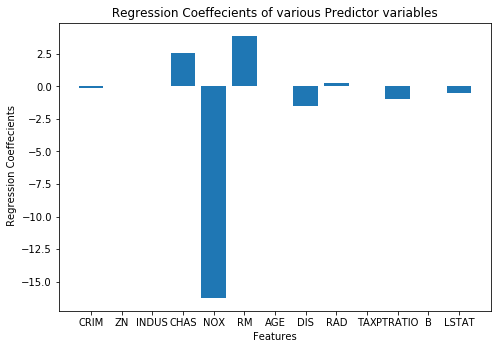

In [0]:
import matplotlib.pyplot as plt
import numpy as np
ind=np.arange(13)
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.bar(ind,house_price.feature_names,ols.coef_)
#ind
onx=house_price.feature_names
ony=ols.coef_
ax.bar(onx,ony)
plt.title(" Regression Coeffecients of various Predictor variables ")
plt.ylabel(" Regression Coeffecients")
plt.xlabel("Features")

ony

**INFERNCE**

 The feature NOX: Nitric oxide concentration (parts per 10 million) has the lagrest regression coeffecient or weight thus we can say that this is the most important feature for predicting our target variable i.e HOUSE PRICE.
 Also some of the weights are zero which implies that they are not required for predicting the value of target variable. Thus can be called as '**REDUNDANT VARIABLES**'.

 We can infer so only because we have **normalized our data** , if that was not the case then we could not have related **coeffecient of the feature with its importance**.



# **TASK -2** :-  Plot the regression coefficient (β ¿ estimates with ridge regression for predictors: room, residential zone, highway access, crime rate and tax as λ varies from 0-200.

In [0]:
#regression coeffecients for different values of alpha
room=[]
residential_zone=[]
highway_access=[]
crime_rate=[]
tax=[]
alpha=[]

for i in range(200):                                       # iterating over values of alpha 
  alpha.append(i)
  ridge=linear_model.Ridge(alpha=i,normalize='True')       #Derived the ridge Regressor
  ridge.fit(xtrain,ytrain)
  crime_rate.append(ridge.coef_[0])
  room.append(ridge.coef_[5])
  residential_zone.append(ridge.coef_[1])
  highway_access.append(ridge.coef_[8])
  tax.append(ridge.coef_[9])



Text(0.5, 0, 'alpha')

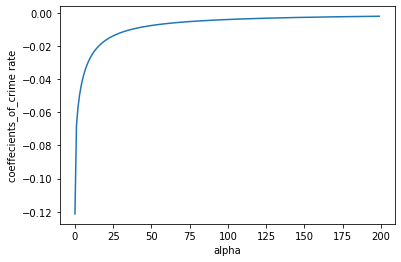

In [0]:
plt.plot(alpha,crime_rate)
plt.ylabel("coeffecients_of_crime rate")
plt.xlabel("alpha")





Text(0.5, 0, 'alpha')

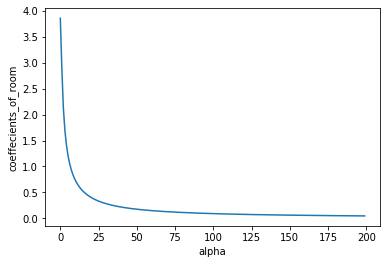

In [0]:
plt.plot(alpha,room)
plt.ylabel("coeffecients_of_room")
plt.xlabel("alpha")




Text(0.5, 0, 'alpha')

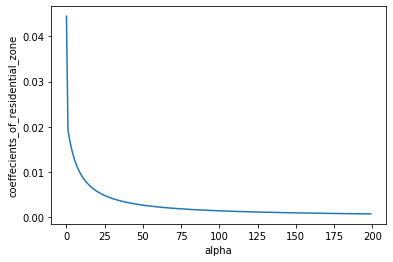

In [0]:

plt.plot(alpha,residential_zone)
plt.ylabel("coeffecients_of_residential_zone")
plt.xlabel("alpha")



Text(0.5, 0, 'alpha')

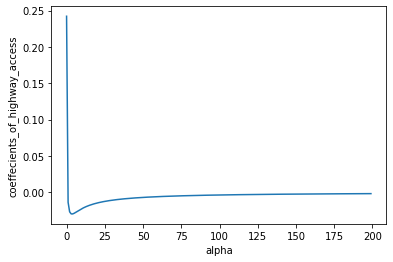

In [0]:
plt.plot(alpha,highway_access)
plt.ylabel("coeffecients_of_highway_access")
plt.xlabel("alpha")



Text(0.5, 0, 'alpha')

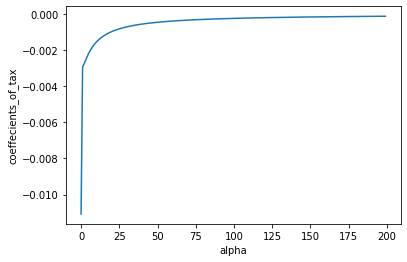

In [0]:
plt.plot(alpha,tax)
plt.ylabel("coeffecients_of_tax")
plt.xlabel("alpha")

**INFERNCE** :-

The common observation from the above 5 plots is that on increasing regularization coeffecients the value of coeffecients are going to zero(however they are not exactly zero , as ridge reduces the magnitude of not so important variables rather than driving them to zero) that is curve is getting smoother and simpler which was supposed to happen because as regularization coeffecients increases , underfitting takes place.

As we are not giving freedom to the model to get complex and reduce the error due to very high penalty term in the cost function.


In [0]:
yr_pred_test=ridge.predict(xtest)
print(mean_squared_error(yr_pred_test,ytest))

30.68161175255442


In [0]:
yr_pred_train=ridge.predict(xtrain)
print(mean_squared_error(yr_pred_train,ytrain))


23.13551890992048


# TASK -3 :- Plot the regression coefficient (β ¿ estimates with lasso regression for predictors: room, residential zone, highway access, crime rate and tax as λ varies from 0-200.

In [0]:

room=[]
residential_zone=[]
highway_access=[]
crime_rate=[]
tax=[]
alpha=[]


for i in range(1,200):                  #warning:-coordinate descent does not work well with alpha=0 can give unexpected results IN LASSO
  alpha.append(i)                             
  lasso=linear_model.Lasso(alpha=i)
  lasso.fit(xtrain,ytrain)
  crime_rate.append(lasso.coef_[0])
  room.append(lasso.coef_[5])
  residential_zone.append(lasso.coef_[1])
  highway_access.append(lasso.coef_[8])
  tax.append(lasso.coef_[9])







Text(0.5, 0, 'alpha')

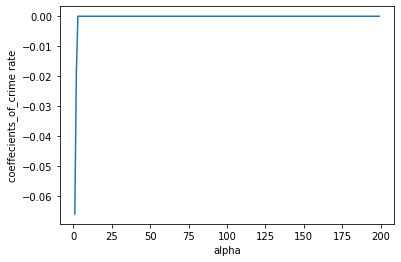

In [0]:
plt.plot(alpha,crime_rate)
plt.ylabel("coeffecients_of_crime rate")
plt.xlabel("alpha")



Text(0.5, 0, 'alpha')

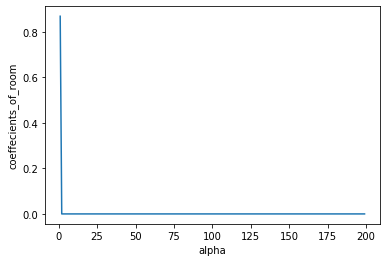

In [0]:
plt.plot(alpha,room)
plt.ylabel("coeffecients_of_room")
plt.xlabel("alpha")



Text(0.5, 0, 'alpha')

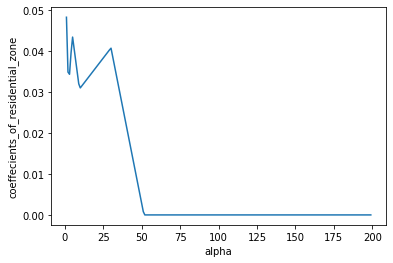

In [0]:
plt.plot(alpha,residential_zone)
plt.ylabel("coeffecients_of_residential_zone")
plt.xlabel("alpha")



Text(0.5, 0, 'alpha')

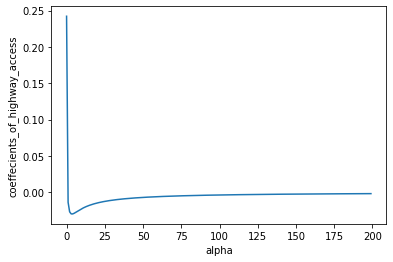

In [0]:
plt.plot(alpha,highway_access)
plt.ylabel("coeffecients_of_highway_access")
plt.xlabel("alpha")




Text(0.5, 0, 'alpha')

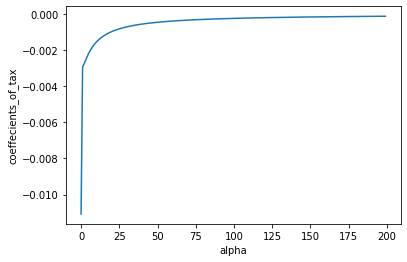

In [0]:
plt.plot(alpha,tax)
plt.ylabel("coeffecients_of_tax")
plt.xlabel("alpha")

**INFERENCE**


(1) Lasso tend to give sparse weights (most zeros), because the l1 regularization cares equally about driving down big weights->small weights, or driving small weights->0. If we have a lot of predictors (features), and you suspect that not all of them are that important, Lasso is really good idea to start with.

(2) Ridge tends to give small but well distributed weights, because the l2 regularization cares more about driving big weight->small weights, instead of driving small weights->0. If you only have few predictors, and you are confident that all of them should be really relevant for predictions, we should try Ridge as a good regularized linear regression method.


And as the weights of these features(the 5 which are given ) are going to zero on increasing regularization coeffecients , this is a clear indication of model getting simpler and simpler(underitting)

# TASK -4 :-For all the above models, plot the residuals obtained for the training data. You may choose any three values of λ to plot the residuals for ridge and lasso regression.

Text(0.5, 1.0, 'Residual plot for OLS Regressor')

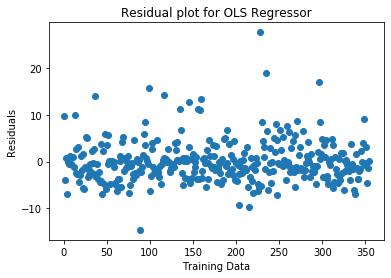

In [0]:
#task4


ypred_train=ols.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)

residuals
plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for OLS Regressor")

Text(0.5, 1.0, 'Residual plot for ridge Regressor alpha=50')

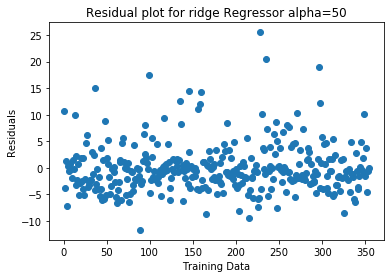

In [0]:
ridge=linear_model.Ridge(alpha=50)
ridge.fit(xtrain,ytrain)
ypred_train=ridge.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for ridge Regressor alpha=50")


Text(0.5, 1.0, 'Residual plot for ridge Regressor alpha=100')

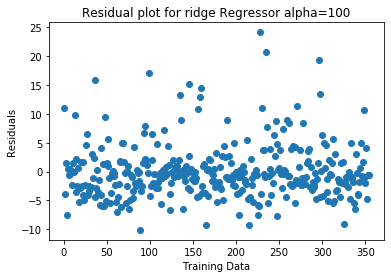

In [0]:
ridge=linear_model.Ridge(alpha=100)
ridge.fit(xtrain,ytrain)
ypred_train=ridge.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for ridge Regressor alpha=100")


Text(0.5, 1.0, 'Residual plot for ridge Regressor alpha=200')

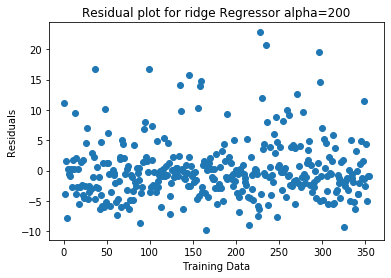

In [0]:
ridge=linear_model.Ridge(alpha=200)
ridge.fit(xtrain,ytrain)
ypred_train=ridge.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for ridge Regressor alpha=200")


Text(0.5, 1.0, 'Residual plot for lasso Regressor alpha=50')

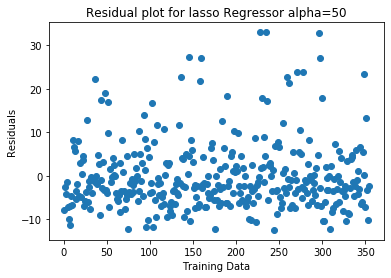

In [0]:

lasso=linear_model.Lasso(alpha=50)
lasso.fit(xtrain,ytrain)
ypred_train=lasso.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for lasso Regressor alpha=50")

Text(0.5, 1.0, 'Residual plot for lasso Regressor alpha=100')

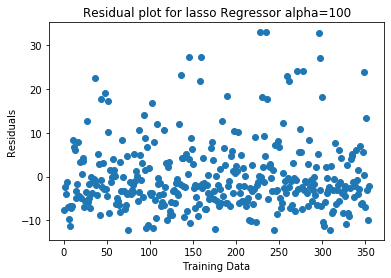

In [0]:

lasso=linear_model.Lasso(alpha=100)
lasso.fit(xtrain,ytrain)
ypred_train=lasso.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for lasso Regressor alpha=100")

Text(0.5, 1.0, 'Residual plot for lasso Regressor alpha=200')

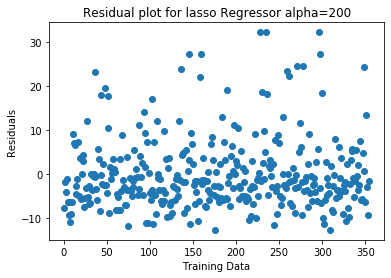

In [0]:

lasso=linear_model.Lasso(alpha=200)
lasso.fit(xtrain,ytrain)
ypred_train=lasso.predict(xtrain)

residuals=[]
residuals=ytrain-ypred_train

index_traindata=[]
for i in range(1,355):
  index_traindata.append(i)


plt.scatter(index_traindata,residuals)
plt.ylabel("Residuals")
plt.xlabel("Training Data")
plt.title("Residual plot for lasso Regressor alpha=200")

**INFERENCE**

**As The value of regularization coeffecient is increasing we can see more outliers in the residual plot which is a clear indication of underfitting.**


It proved as a good way of checking whether a regression, simple or multiple, has achieved its goal to explain as much variation as possible in a dependent variable while respecting the underlying assumption, is to check the residuals of a regression. In other words having a detailed look at what is left over after explaining the variation in the dependent variable using independent variable(s), i.e. the unexplained variation.

Ideally all residuals should be small and unstructured; this then would mean that the regression analysis has been successful in explaining the essential part of the variation of the dependent variable. If however residuals exhibit a structure or present any special aspect that does not seem random, it sheds a "bad light" on the regression. Most problems that were initially overlooked when diagnosing the variables in the model or were impossible to see, will, turn up in the residuals, for instance:

Outliers that have been overlooked, will show up  as, often, very big residuals.
If the relationship is not linear, some structure will appear in the residuals
Non-constant variation of the residuals (heteroscedasticity)
If groups of observations were overlooked, they'll show up in the residuals
etc.

In one word, the analysis of residuals acted as a very  powerful diagnostic tool, to help assess, whether some of the underlying assumptions of regression have been violated.

# Task -5 :-  Tabulate the mean training and test errors for each of the above models. Based on the results observed, summarize your conclusions and learnings from this exercise.

In [0]:
#task 5     once variance of each feature data is almost same or say that data is normalized , then weight of each feature will tell you its importance in predicting label

ridge=linear_model.Ridge(alpha=0.001)
ridge1=linear_model.Ridge(alpha=0.01)
ridge2=linear_model.Ridge(alpha=0.1)
ridge.fit(xtrain,ytrain)
ridge1.fit(xtrain,ytrain)
ridge2.fit(xtrain,ytrain)
lasso=linear_model.Lasso(alpha=0.001)
lasso1=linear_model.Lasso(alpha=0.01)
lasso2=linear_model.Lasso(alpha=0.1)


lasso.fit(xtrain,ytrain)
lasso1.fit(xtrain,ytrain)
lasso2.fit(xtrain,ytrain)

df=pd.DataFrame({'Training error' : [mean_squared_error(ytrain,ols.predict(xtrain)),mean_squared_error(ytrain,ridge.predict(xtrain)),mean_squared_error(ytrain,ridge1.predict(xtrain)),mean_squared_error(ytrain,ridge2.predict(xtrain)),mean_squared_error(ytrain,lasso.predict(xtrain)),mean_squared_error(ytrain,lasso1.predict(xtrain)),mean_squared_error(ytrain,lasso2.predict(xtrain))],
                      'Test_Error' :[mean_squared_error(ytest,ols.predict(xtest)),mean_squared_error(ytest,ridge.predict(xtest)),mean_squared_error(ytest,ridge1.predict(xtest)),mean_squared_error(ytest,ridge2.predict(xtest)),mean_squared_error(ytest,lasso.predict(xtest)),mean_squared_error(ytest,lasso1.predict(xtest)),mean_squared_error(ytest,lasso2.predict(xtest))]},index=['OLS','Ridge(alpha=0.001)','Ridge(alpha=0.01)','Ridge(alpha=0.1)','Lasso(alpha=0.001)','Lasso(alpha=0.01)','Lasso(alpha=0.1)'])


df



,Training error,Test_Error
OLS,19.958220,27.195966
Ridge(alpha=0.001),19.958221,27.196652
Ridge(alpha=0.01),19.958290,27.202844
Ridge(alpha=0.1),19.964204,27.265601
Lasso(alpha=0.001),19.958591,27.211607
Lasso(alpha=0.01),19.994758,27.386681
Lasso(alpha=0.1),20.926031,28.875759


# Plot for inference

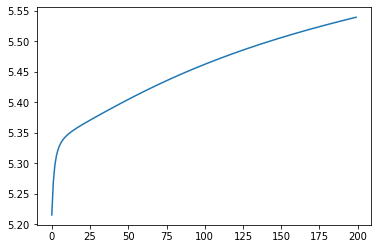

In [0]:
#finding alpha for which minimum errors are there      
#                                                     why no bell for lasso(convex)/ridge    maybe no overfitting?

test_error=[]
train_error=[]
alpha=[]
for i in np.arange(200):
  alpha.append(i)
  Ridge=linear_model.Ridge(alpha=i)
  Ridge.fit(xtrain,ytrain)
  test_error.append(mean_squared_error(ytest,Ridge.predict(xtest))**0.5)
  train_error.append(mean_squared_error(ytrain,Ridge.predict(xtrain))**.5)
  


plt.plot(alpha,test_error)
#plt.plot(alpha,train_error)

**Inference And Learning**

I was expecting a convex curve (between test errors and different values of alpha(regularization coeffecient ) as if we would penalize less i.e keep alpha value to be less than the model has the freedom to overfit on training data and thus it can overfit(high test errors) , whereas if we increase the value of alpha ie penalize too much then we are not allowing model to learn all the underlying patterns in the data by keeping a strict bound on parameters.
Thus a region of underfitting should come(high test errors).

Between these two regions of high test errors we should find a optimal value of regularization coeffecient where test error is minimum .


BUT when this curve was plotted for ridge Regressor , I didnt got the left part which would have represented Overfitting . This is leading me to believe that ols regressor didnt overfit that much on training data and thus lasso and ridge didnt hepled that much in reducing test error as it is significant from the above dataframe.

Both lasso and ridge are good ways to prevent overitting whereas Lasso regression has one plus point that it not only helps in reducing over-fitting but it can help us
in feature selection also.




